In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
import glob,os

In [2]:
#path = 'C:/Users/AVIK/Documents/Udacity Self Driving Cars/CarND-Vehicle-Detection-master/'
path = ''
infile_car = glob.glob(path+"vehicles/*/*.png")

vehicles = np.asarray(infile_car)    

In [3]:
notvehicles_files = []    
infile_notcars = glob.glob(path+"non-vehicles/*/*.png")
    
notvehicles = np.asarray(infile_notcars)    

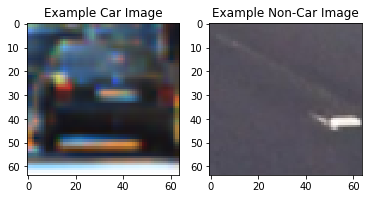

In [4]:
veh_idx = np.random.randint(len(vehicles))
notveh_idx = np.random.randint(len(notvehicles))
plt.subplot(121)
example_car_image = plt.imread(vehicles[veh_idx])
plt.imshow(example_car_image)
plt.title('Example Car Image')
plt.subplot(122)
example_noncar_image = plt.imread(notvehicles[notveh_idx])
plt.imshow(example_noncar_image)
plt.title('Example Non-Car Image')

In [5]:
print("Number of vehicle images are {}".format(len(vehicles)))
print("Number of not vehicle images are {}".format(len(notvehicles)))

Number of vehicle images are 8792
Number of not vehicle images are 8968


In [6]:
from skimage.feature import hog

def convert_color(img, convTo='RGB'):
    if convTo == 'HSV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    elif convTo == 'LUV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    elif convTo == 'HLS':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    elif convTo == 'YUV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    elif convTo == 'YCrCb':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_image = img
    return feature_image
  
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm= 'L2-Hys',
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       block_norm= 'L2-Hys',
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features
                        
def color_hist(img, nbins=32):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


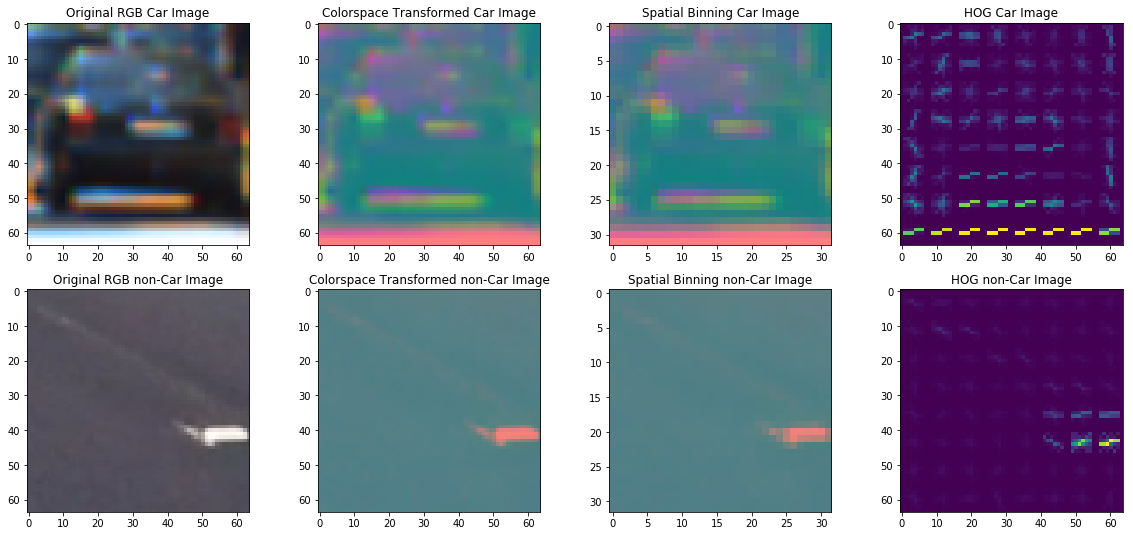

In [7]:
colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 15
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_feat=True
hist_feat=True
hog_feat=True
spatial_size = (32,32)
hist_bins = 32

car_image = convert_color(example_car_image, colorspace) 
noncar_image = convert_color(example_noncar_image, colorspace)

spatial_feat_car = bin_spatial(car_image, size=spatial_size)
spatial_feat_car = np.reshape(spatial_feat_car,(spatial_size[0],spatial_size[1],3))
spatial_feat_noncar = bin_spatial(noncar_image, size=spatial_size)
spatial_feat_noncar = np.reshape(spatial_feat_noncar,(spatial_size[0],spatial_size[1],3))

hist_feat_car = color_hist(car_image, nbins=hist_bins)
hist_feat_noncar = color_hist(example_noncar_image, nbins=hist_bins)

car_hog_feature, car_hog_image = get_hog_features(car_ch1,
                                        orient, pix_per_cell, cell_per_block,
                                        vis=True, feature_vec=True)

noncar_hog_feature, noncar_hog_image = get_hog_features(noncar_ch1,
                                        orient, pix_per_cell, cell_per_block,
                                        vis=True, feature_vec=True)

f, axs = plt.subplots(2, 4, figsize=(20, 9))
axs = axs.ravel()
axs[0].imshow(example_car_image)
axs[0].set_title('Original RGB Car Image')
axs[1].imshow(car_image)
axs[1].set_title('Colorspace Transformed Car Image')
axs[2].imshow(spatial_feat_car)
axs[2].set_title('Spatial Binning Car Image')
axs[3].imshow(car_hog_image)
axs[3].set_title('HOG Car Image')
axs[4].imshow(example_noncar_image)
axs[4].set_title('Original RGB non-Car Image')
axs[5].imshow(noncar_image)
axs[5].set_title('Colorspace Transformed non-Car Image')
axs[6].imshow(spatial_feat_noncar)
axs[6].set_title('Spatial Binning non-Car Image')
axs[7].imshow(noncar_hog_image)
axs[7].set_title('HOG non-Car Image')

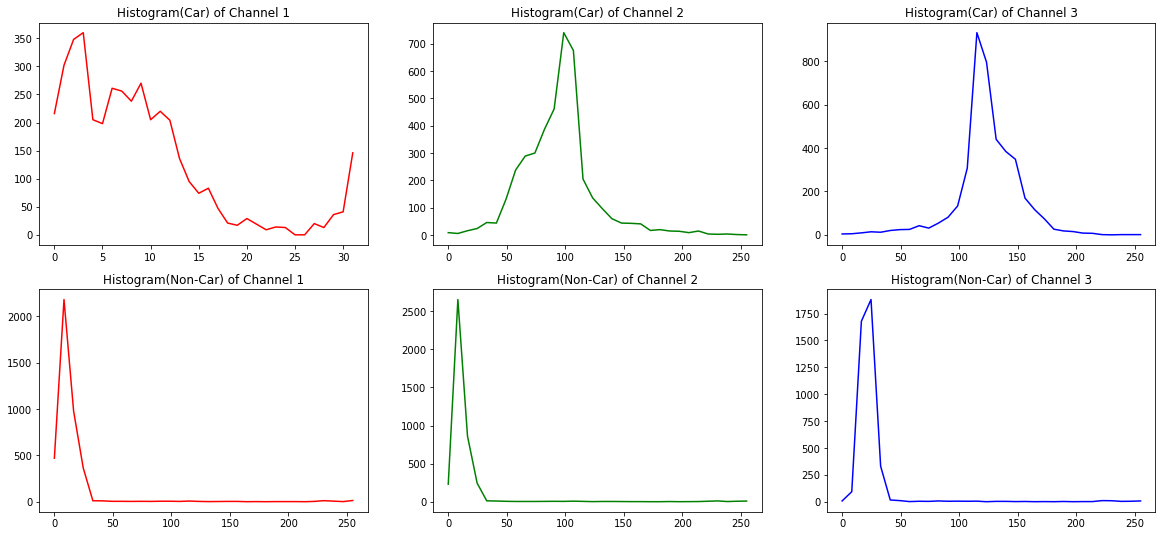

In [9]:
f, axs = plt.subplots(2, 3, figsize=(20, 9))
axs = axs.ravel()

bins = np.linspace(0,255,hist_bins)
axs[0].plot(hist_feat_car[0:hist_bins],'red')
axs[0].set_title('Histogram(Car) of Channel 1')
axs[1].plot(bins, hist_feat_car[hist_bins:2*hist_bins],'green')
axs[1].set_title('Histogram(Car) of Channel 2')
axs[2].plot(bins, hist_feat_car[2*hist_bins:3*hist_bins],'blue')
axs[2].set_title('Histogram(Car) of Channel 3')
axs[3].plot(bins, hist_feat_noncar[0:hist_bins],'red')
axs[3].set_title('Histogram(Non-Car) of Channel 1')
axs[4].plot(bins, hist_feat_noncar[hist_bins:2*hist_bins],'green')
axs[4].set_title('Histogram(Non-Car) of Channel 2')
axs[5].plot(bins, hist_feat_noncar[2*hist_bins:3*hist_bins],'blue')
axs[5].set_title('Histogram(Non-Car) of Channel 3')

In [11]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace, spatial_size = (32, 32),
                        hist_bins=32, orient=15, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        #image = np.squeeze(imgs[idx,:,:,:])
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            feature_image = convert_color(image, convTo=cspace)
        else: 
            feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features


In [13]:
import random
from sklearn.model_selection import train_test_split

examples_to_sample = 2500

vehicles_idx = random.sample(range(1, len(vehicles)), examples_to_sample)
cars = vehicles[vehicles_idx]
notvehicles_idx = random.sample(range(1, len(notvehicles)), examples_to_sample)
notcars = notvehicles[notvehicles_idx]

car_features = extract_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel,spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel,spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = 43
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)



In [14]:
print('Num of training samples {}'.format(len(y_train)))
print('Num of test samples {}'.format(len(y_test)))

Num of training samples 4000
Num of test samples 1000


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
import time

# Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e4],
#                     'C': [1, 10]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

t_start = time.time()
# Use optimal model fitting
svc = LinearSVC()
clf = svc.fit(X_train, y_train)
t_stop = time.time()

print("Time to find a model {} sec".format(t_stop-t_start))

#clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
#clf.fit(X_train, y_train)

print("Test classification accuracy - {}%".format(clf.score(X_test, y_test)*100))

#y_true, y_pred = y_test, clf.predict(X_test)
   

Using: 15 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 11988
Time to find a model 5.668658971786499 sec
Test classification accuracy - 98.2%


In [16]:
import pickle
filename = 'saved_optimal_SVM_model'
pickle.dump(clf, open(filename,'wb'))
filename = 'saved_X_scaler'
pickle.dump(X_scaler, open(filename,'wb'))

In [17]:
feature_params = {'colorspace' : colorspace, 'orient' : orient, 'pix_per_cell' : pix_per_cell, 'cell_per_block' : cell_per_block,
            'hog_channel' : hog_channel, 'spatial_feat' : spatial_feat, 'hist_feat' : hist_feat, 'hog_feat' : hog_feat}

with open('saved_feature_params.pickle', 'wb') as handle:
    pickle.dump(feature_params, handle, protocol=pickle.HIGHEST_PROTOCOL)
